In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# from scratch

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.181891,1.784243,-2.640908,0.559095,0.692394,1
1,-0.210008,2.424244,-2.285595,0.247492,0.329469,1
2,-0.525119,3.360393,-2.510846,0.859166,-0.961768,1
3,0.328597,1.828340,-1.723509,-0.565512,1.312607,1
4,0.390892,-0.520129,1.651990,0.843989,0.079219,0


In [4]:
import random

In [5]:
# function for row sampling
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [6]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols] 
  new_df['target'] = df['target']
  return new_df

In [7]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [8]:
df1 = combined_sampling(df,0.5,0.5)

/tmp/ipykernel_17/1113760924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [9]:
df1.sample(7)

,col1,col5,target
58,1.603083,0.711610,1
76,1.564485,2.163145,0
35,2.349177,1.446857,1
68,1.229069,1.194614,0
73,4.312019,0.658490,1
75,0.770667,1.971406,0
26,-0.588204,0.154414,1


In [10]:
df2 = combined_sampling(df,0.5,0.5)

/tmp/ipykernel_17/1113760924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [11]:
df3 = combined_sampling(df,0.5,0.5)

/tmp/ipykernel_17/1113760924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [12]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col5', 'target'], dtype='object')
Index(['col1', 'col4', 'target'], dtype='object')
Index(['col4', 'col1', 'target'], dtype='object')


In [13]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [14]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [15]:
from sklearn.tree import plot_tree

[Text(0.71875, 0.9545454545454546, 'x[1] <= 2.792\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.65625, 0.8636363636363636, 'x[1] <= 1.452\ngini = 0.498\nsamples = 45\nvalue = [24, 21]'),
 Text(0.6875, 0.9090909090909092, 'True  '),
 Text(0.4375, 0.7727272727272727, 'x[0] <= 1.307\ngini = 0.469\nsamples = 32\nvalue = [12, 20]'),
 Text(0.3125, 0.6818181818181818, 'x[0] <= -0.608\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.25, 0.5909090909090909, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.375, 0.5909090909090909, 'x[1] <= 1.301\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.3125, 0.5, 'x[1] <= 0.515\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.25, 0.4090909090909091, 'x[1] <= 0.101\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.125, 0.3181818181818182, 'x[0] <= 0.378\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.0625, 0.22727272727272727, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1875, 0.22727272727272727, 'x[0] <= 0.

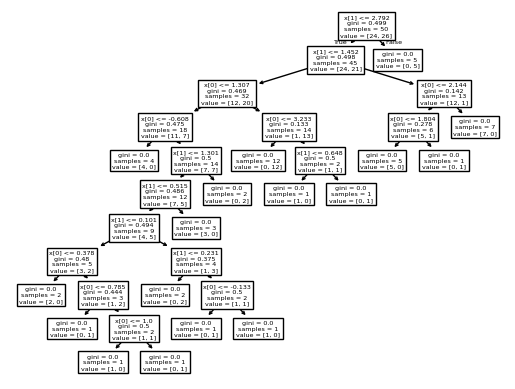

In [16]:
plot_tree(clf1)

[Text(0.43333333333333335, 0.9285714285714286, 'x[0] <= 0.995\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.2, 0.7857142857142857, 'x[1] <= -0.138\ngini = 0.461\nsamples = 25\nvalue = [16, 9]'),
 Text(0.31666666666666665, 0.8571428571428572, 'True  '),
 Text(0.13333333333333333, 0.6428571428571429, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.26666666666666666, 0.6428571428571429, 'x[1] <= 0.539\ngini = 0.397\nsamples = 22\nvalue = [16, 6]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= 1.177\ngini = 0.469\nsamples = 16\nvalue = [10, 6]'),
 Text(0.2, 0.35714285714285715, 'x[1] <= 0.852\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.13333333333333333, 0.21428571428571427, 'x[1] <= 0.585\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.06666666666666667, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0

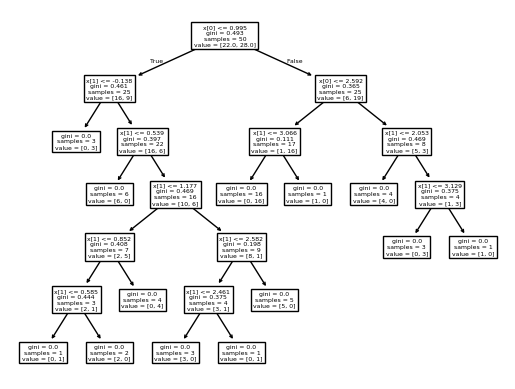

In [17]:
plot_tree(clf2)

[Text(0.4666666666666667, 0.9583333333333334, 'x[0] <= -0.128\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.3333333333333333, 0.875, 'x[1] <= 1.307\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.4, 0.9166666666666667, 'True  '),
 Text(0.26666666666666666, 0.7916666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.4, 0.7916666666666666, 'x[1] <= 2.043\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.7083333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4666666666666667, 0.7083333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.875, 'x[1] <= -1.129\ngini = 0.464\nsamples = 41\nvalue = [15, 26]'),
 Text(0.5333333333333333, 0.9166666666666667, '  False'),
 Text(0.5333333333333333, 0.7916666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.7916666666666666, 'x[1] <= 2.885\ngini = 0.432\nsamples = 38\nvalue = [12, 26]'),
 Text(0.6, 0.7083333333333334, 'x[0] <= 2.687\ngini

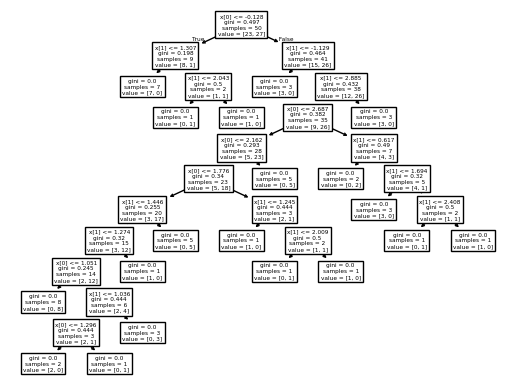

In [18]:
plot_tree(clf3)

In [19]:
print(clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2)))
print(clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2)))
print(clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2)))

[0]
[0]
[0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# via sklearn

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [21]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X.shape

(500, 2)

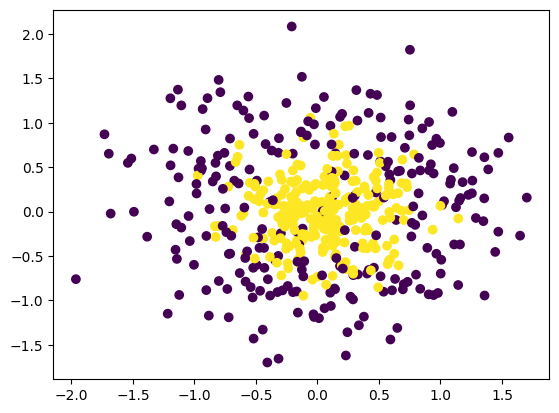

In [23]:
plt.scatter(X[:,0],X[:,1],c=y)

In [24]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

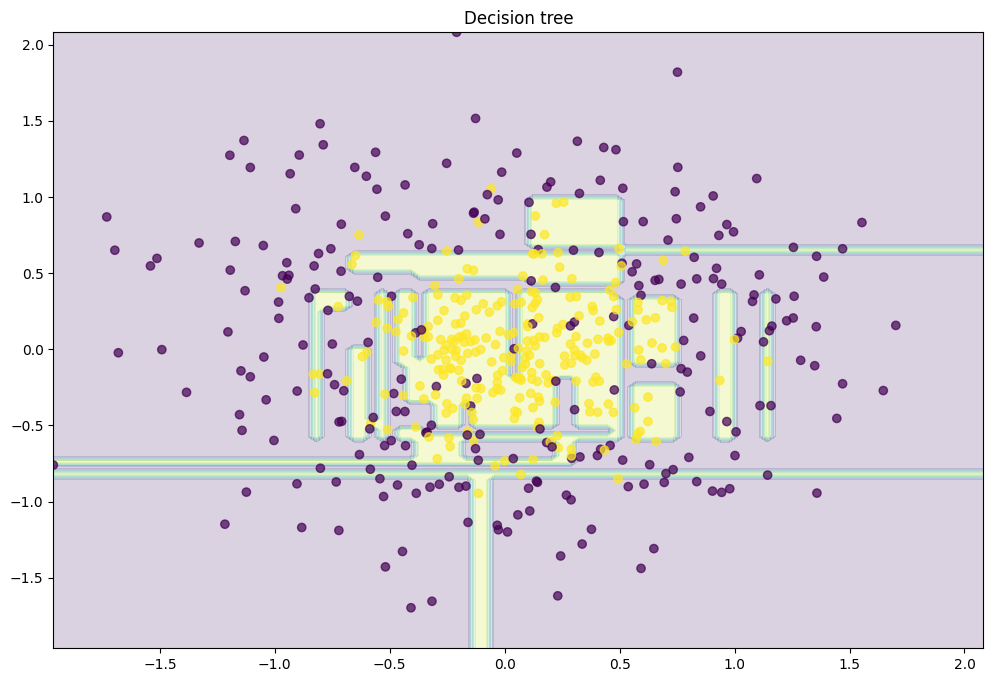

In [25]:
plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

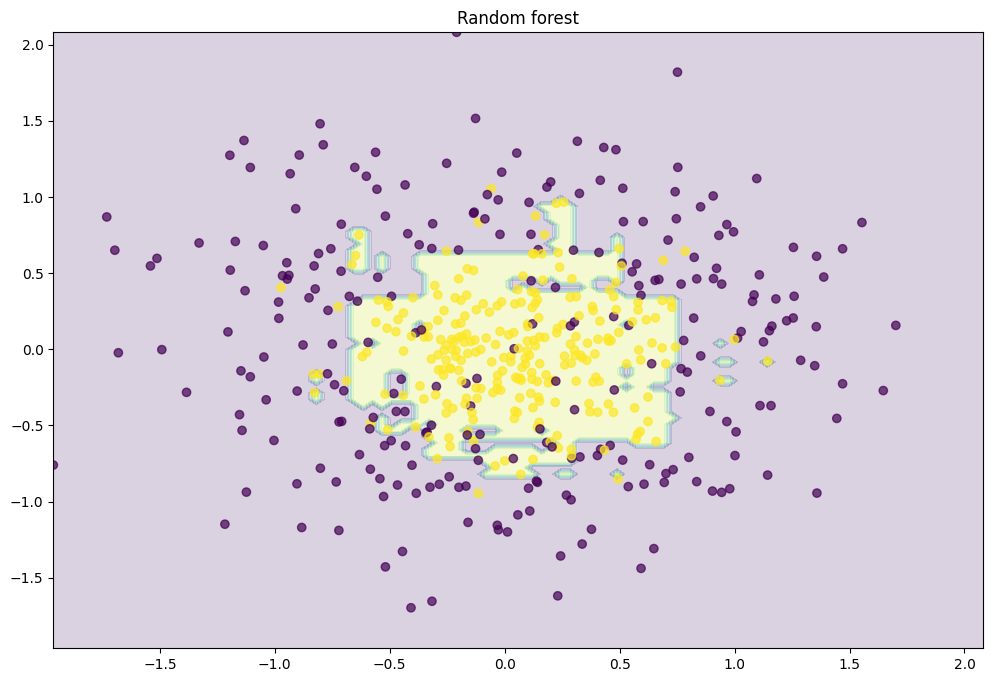

In [27]:
plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, alpha=.7)
plt.title("Random forest")
plt.show()

In [28]:
n_train = 150 
n_test = 1000
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)+ np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

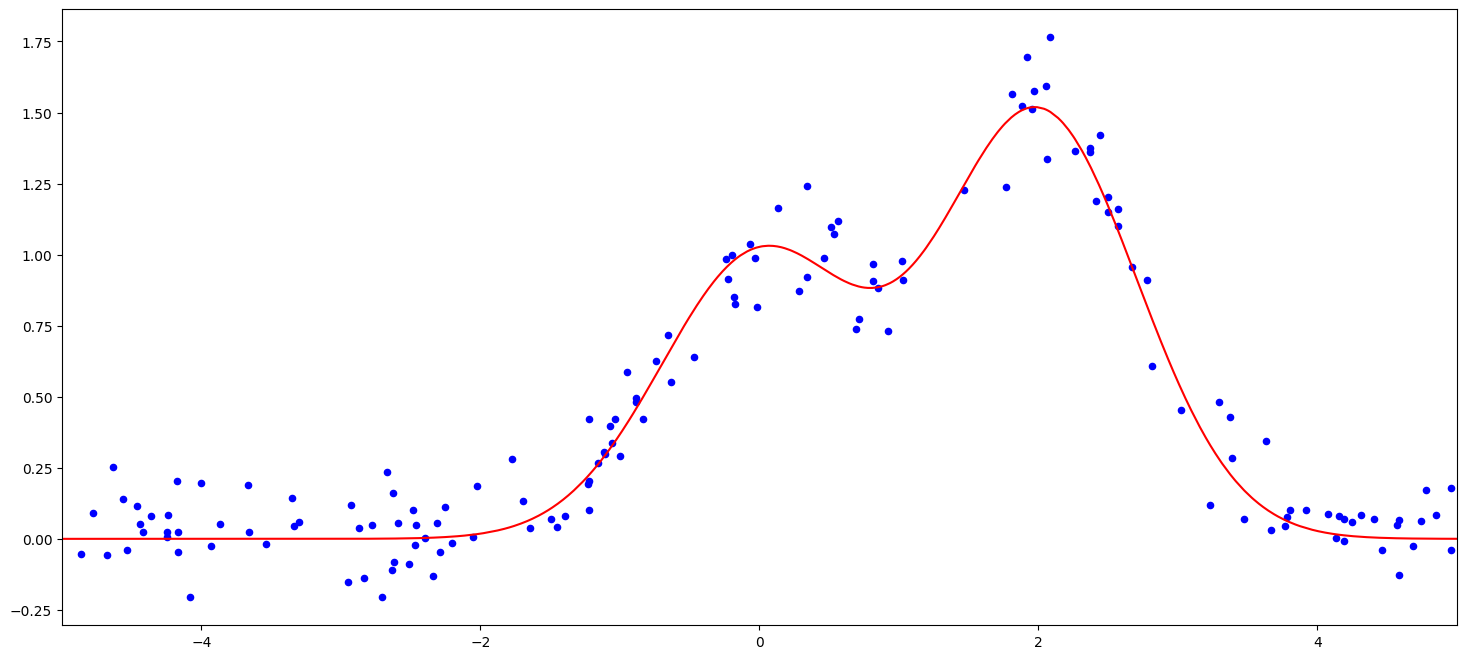

In [29]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 25.05')

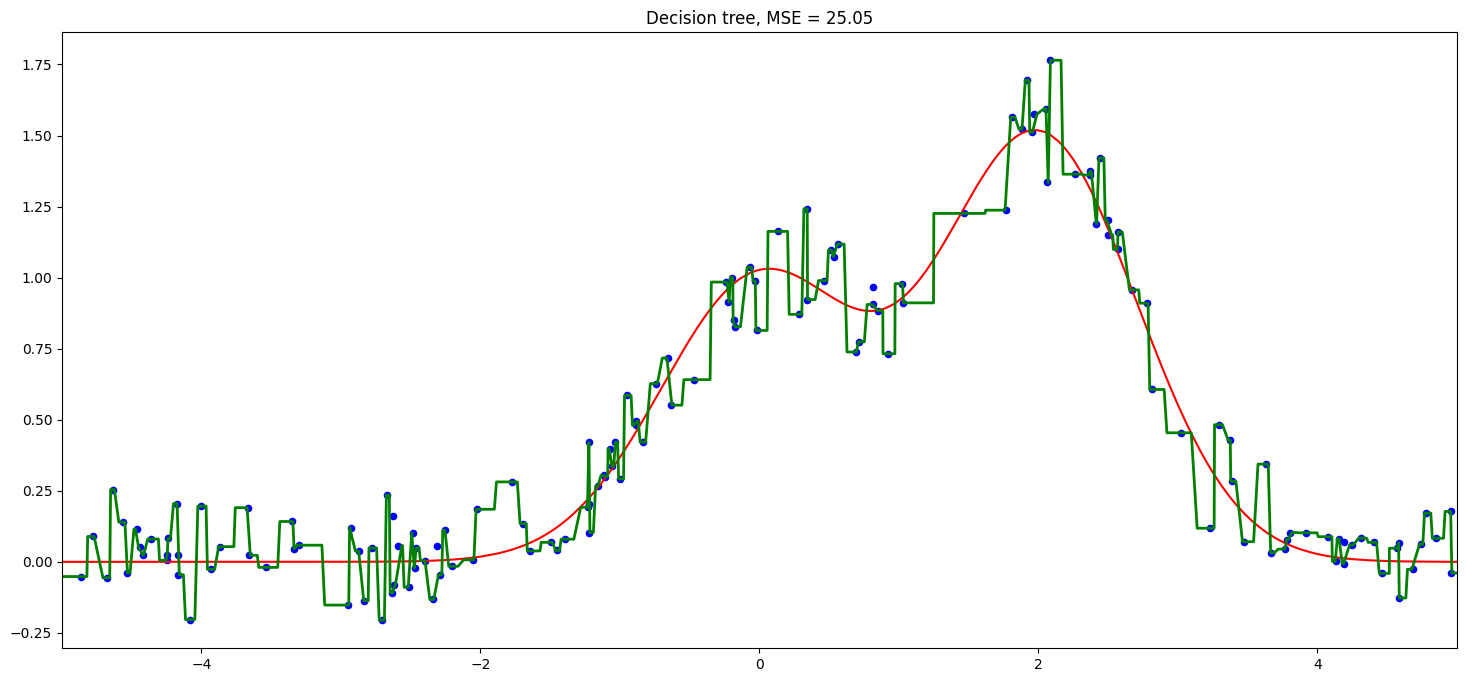

In [30]:
# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f"% np.sum((y_test - d_predict) ** 2))

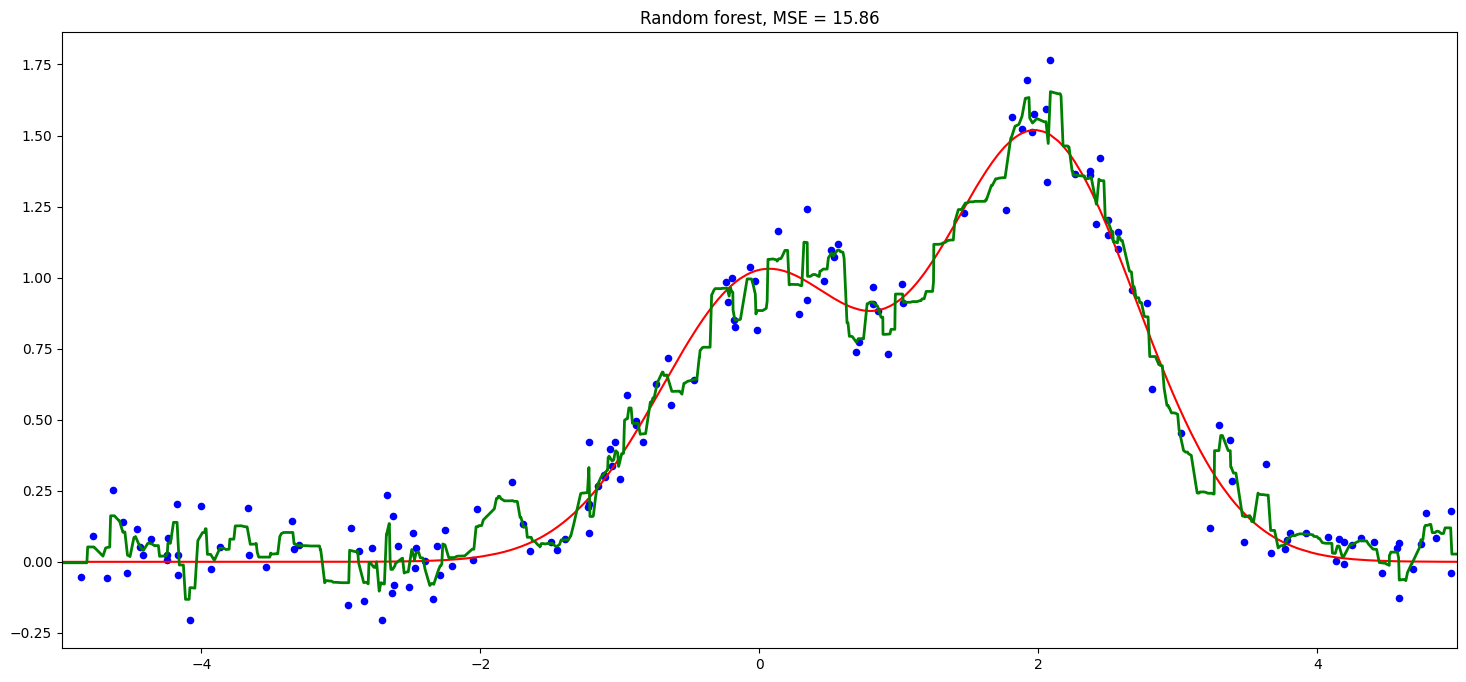

In [31]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

# OOB score

In [32]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartt/heart.csv


In [34]:
df = pd.read_csv("/kaggle/input/heartt/heart.csv")

In [35]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [38]:
rf.oob_score_ #basically validation score 

0.8016528925619835

In [39]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

# Comparision of RF

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [41]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

In [42]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Random Forest Accuracy :",accuracy_score(y_test,y_pred))

Random Forest Accuracy : 0.8360655737704918


In [43]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print("Gradient Boosting Accuracy :",accuracy_score(y_test,y_pred))

Gradient Boosting Accuracy : 0.7704918032786885


In [44]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print("SVC Accuracy :",accuracy_score(y_test,y_pred))

SVC Accuracy : 0.7049180327868853


In [45]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy :",accuracy_score(y_test,y_pred))

Logistic Regression Accuracy : 0.8852459016393442


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Hyperparameter Tuned Random Forest Accuracy :",accuracy_score(y_test,y_pred))

Hyperparameter Tuned Random Forest Accuracy : 0.9016393442622951


In [47]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))


np.float64(0.8347311827956989)

GridSearchCV

In [48]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

In [49]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [50]:
rf = RandomForestClassifier()

In [51]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [52]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=60; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=120; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=20; total time=   0.1s

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [53]:
rf_grid.best_params_

{'max_depth': 2, 'max_features': 0.2, 'max_samples': 0.75, 'n_estimators': 100}

In [54]:
rf_grid.best_score_

np.float64(0.8387755102040817)

randomSearchCV

In [55]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [56]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [57]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [58]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py", line 431, in fit
    raise ValueError(
ValueError:

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [59]:
rf_grid.best_params_

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 1.0,
 'max_features': 1.0,
 'max_depth': None,
 'bootstrap': True}

In [60]:
rf_grid.best_score_

np.float64(0.8181972789115646)

# Feature Importance

In [61]:
import seaborn as sns

In [62]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [63]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

In [65]:
rf.feature_importances_

array([0.08622832, 0.03677156, 0.13363003, 0.068247  , 0.07386277,
       0.01043627, 0.02280138, 0.12357426, 0.0617983 , 0.11947419,
       0.04439993, 0.12018276, 0.09859322])

# Bagging vs Random Forest

In [66]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [67]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [68]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.563586,-0.263794,2.011652,-0.311677,-1.969041,1
1,2.643058,-1.169654,-1.656020,-2.916467,3.178401,0
2,1.183446,-1.279312,2.398796,-0.264681,-1.032056,1
3,-0.966189,1.955538,3.075573,-3.363858,2.321644,1
4,2.121859,-1.891619,1.126605,0.659215,-0.903033,1


In [69]:
bag = BaggingClassifier(max_features=2) 
#Tree based Feature sampling 

In [70]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

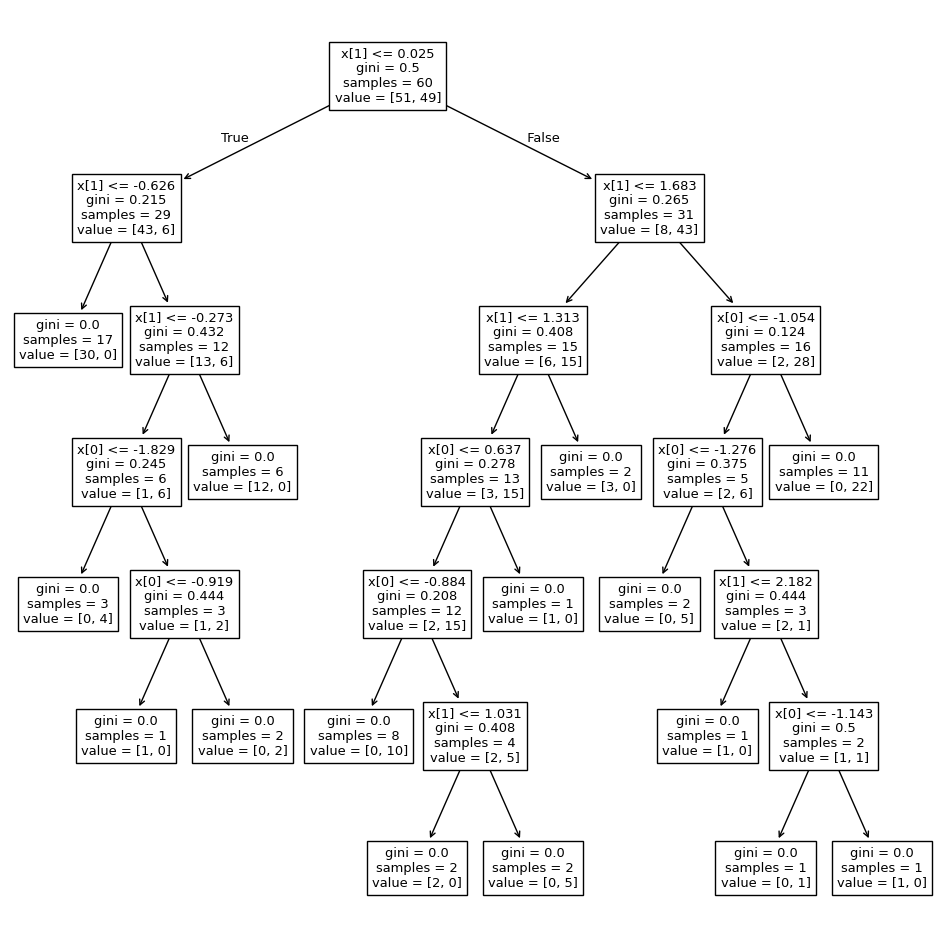

In [71]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [72]:
bag.estimators_

[DecisionTreeClassifier(random_state=164192341),
 DecisionTreeClassifier(random_state=1425844642),
 DecisionTreeClassifier(random_state=573022096),
 DecisionTreeClassifier(random_state=1764815729),
 DecisionTreeClassifier(random_state=1312538721),
 DecisionTreeClassifier(random_state=8309731),
 DecisionTreeClassifier(random_state=1361848855),
 DecisionTreeClassifier(random_state=956506830),
 DecisionTreeClassifier(random_state=1139671011),
 DecisionTreeClassifier(random_state=1033304859)]

In [73]:
rf = RandomForestClassifier(max_features=2)
#node based feature sampling 
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

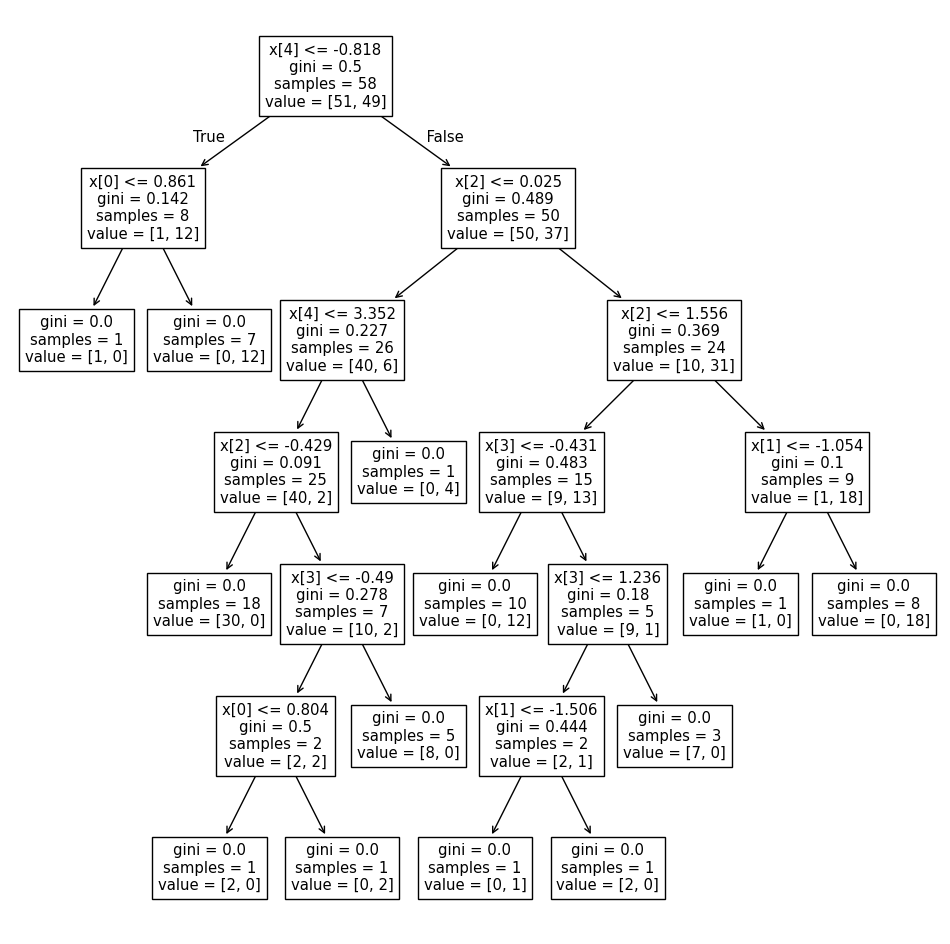

In [74]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

In [75]:
rf.estimators_

[DecisionTreeClassifier(max_features=2, random_state=461496639),
 DecisionTreeClassifier(max_features=2, random_state=198412389),
 DecisionTreeClassifier(max_features=2, random_state=72639916),
 DecisionTreeClassifier(max_features=2, random_state=341865321),
 DecisionTreeClassifier(max_features=2, random_state=1759065809),
 DecisionTreeClassifier(max_features=2, random_state=1772125113),
 DecisionTreeClassifier(max_features=2, random_state=1158052094),
 DecisionTreeClassifier(max_features=2, random_state=761718291),
 DecisionTreeClassifier(max_features=2, random_state=1373002297),
 DecisionTreeClassifier(max_features=2, random_state=30249071),
 DecisionTreeClassifier(max_features=2, random_state=2144693208),
 DecisionTreeClassifier(max_features=2, random_state=1312095544),
 DecisionTreeClassifier(max_features=2, random_state=908090341),
 DecisionTreeClassifier(max_features=2, random_state=329834956),
 DecisionTreeClassifier(max_features=2, random_state=1138899651),
 DecisionTreeClassif